#**Business Case 1: Segmenting Clients**

In this executable notebook you have a logical track of the work, with working code snippets, some method suggestions (absolutely non-binding). Basically: examples of what you can do.


Remember: when it comes to data modeling, there is almost never a "one size fits all", thus you can take various ways to solve the problem.


So feel free to take this code as a draft, change it, even significantly, following your modeling vision. Feel free to explore data and methods and gain experience (yes, even getting it wrong and getting results you don't like - it's quite normal in real applications). You will find some **"HINTS"**: they are just suggestions for you - I mean, you don't have to follow all the suggestions, and if you want you can follow your inspiration, my "Hints" are just ideas...

Remember: **experimenting with data - that's the purpose of this Machine Learning Lab.**

<br>

##Goal

Here we have a random extraction of **a (real-world) dataset made up of a bank's customers**. The data is **anonymous, mostly clean and normalized in [0, 1]**.

We intend to **segment these customers using Data Science techniques** (essentially Unsupervised Machine Learning); this is a segmentation carried out from the perspective of the financial services sector.


The **dataset is called "Dataset1_BankClients"** and is saved as a .xls file.

<br>

In [78]:
import pandas as pd
#from google.colab import drive

#drive.mount('/content/drive')

path = '/Users/mouadh/Fintech_Projects/Business_Case_1/Dataset1_BankClients.xlsx'

# Load data in a DataFrame
data = pd.read_excel(path)

# Let's inspect the first 5 record
print(data.head())
# Drop the column by its actual name (e.g., 'ID' or the actual name of the column)
data = data.drop(columns=['ID'])  # Replace 'ID' with the actual column name to drop


   ID  Age  Gender  Job  Area  CitySize  FamilySize    Income    Wealth  \
0   1   24       1    1     2         2           4  0.668046  0.702786   
1   2   47       1    2     2         3           1  0.858453  0.915043   
2   3   38       0    2     1         2           2  0.926818  0.898316   
3   4   67       0    2     1         2           3  0.538797  0.423180   
4   5   33       0    2     1         3           1  0.806659  0.731404   

       Debt    FinEdu       ESG   Digital  BankFriend  LifeStyle    Luxury  \
0  0.262070  0.741853  0.483684  0.698625    0.618259   0.607877  0.897369   
1  0.730430  0.859423  0.537167  0.959025    0.785936   0.862271  0.913729   
2  0.441272  0.485953  0.649434  0.750265    0.699725   0.755404  0.765199   
3  0.600401  0.493144  0.533829  0.590165    0.675353   0.334432  0.517209   
4  0.831449  0.856286  0.784940  0.710026    0.758793   0.908878  0.611610   

     Saving  Investments  
0  0.283222            1  
1  0.821590            3  

# Preparing data
We extract the variables of interest, also dividing into:
* **Numerical**.
* **Categorical** (excluding the ID, which is not informative at this level).


We have to:
* **Encode categorical variables**, so that they can be digestible by clustering algorithms - they are all trasformed in boolean variables by one-hot encoding.
* **Normalize** in [0, 1] numerical variables.

In [95]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd

# Specify categorical variables
categorical_columns = ['Gender', 'Job', 'Area', 'CitySize', 'Investments']

# Split numerical and categorical variables
numerical_features = data.drop(columns=categorical_columns)  # Exclude categorical variables
categorical_features = data[categorical_columns]  # Select categorical variables

# Convert categorical features to type 'category' (for OneHotEncoder)
categorical_features = categorical_features.astype('category')

# Step 1: One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(categorical_features)

# Step 2: Normalize both numerical and categorical features
scaler = MinMaxScaler()

# Scale numerical features
X_num_scaled = scaler.fit_transform(numerical_features)

# Scale categorical features (after one-hot encoding)
X_cat_scaled = scaler.fit_transform(X_cat_encoded)

# Concatenate scaled numerical and scaled categorical features
X_final = np.concatenate((X_num_scaled, X_cat_scaled), axis=1)


In [97]:
# Print shapes to verify
print("Numerical Features Shape:", X_num_scaled.shape)
print("Categorical Features Shape:", X_cat.shape)
print("Combined Features Shape:", X.shape)

# Print first 5 rows
print("Transformed Dataset (X):")
print(X[:5])

Numerical Features Shape: (5000, 12)
Categorical Features Shape: (5000, 16)
Combined Features Shape: (5000, 28)
Transformed Dataset (X):
[[0.06578947 0.6        0.67959899 0.70589454 0.26826424 0.7707353
  0.46512203 0.71891407 0.58172037 0.61260423 0.90105103 0.29333427
  0.         1.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         1.
  0.         1.         0.         0.        ]
 [0.36842105 0.         0.8732994  0.91909035 0.74769343 0.89288321
  0.52167536 0.98687666 0.77874763 0.86897705 0.9174774  0.85092507
  0.         1.         0.         1.         0.         0.
  0.         0.         1.         0.         0.         0.
  1.         0.         0.         1.        ]
 [0.25       0.2        0.94284635 0.90228868 0.45170142 0.50487324
  0.64038794 0.77205458 0.67744568 0.76127859 0.76833824 0.521778
  1.         0.         0.         1.         0.         0.
  0.         1.         0.         0.         0.         1.
  0.

#Exploratory Data Analysis (EDA)

I keep it minimalist, for the benefit of brevity, to be able to get to the heart of the problem. But you could/can spend tons of time here in order to understand tehe problem and the dataset.

What we are facing this business problem an Unsupervised problem: **clustering with mixed categorical and continuous data**.

Standard clustering algorithms like k-means don’t work well with categorical data - and we have to cope with categorical data...

The point is that sample space for categorical data is discrete, and doesn't have a natural origin, so an Euclidean distance (L2) function on such a space isn't really meaningful. Same story with L1 and other common distances. That is, the basic concept of k-means stands on mathematical calculations (means, Euclidian distances). But what if our data includes also non-numerical features or, in other words, categorical variables?

Let's understand the situation at a glance...

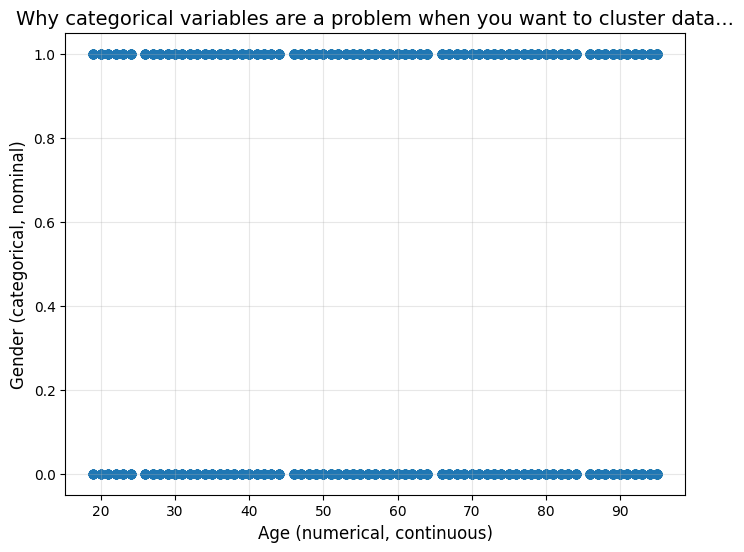

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Creating Gender vs Age scatterplot
plt.scatter(data['Age'], data['Gender'], alpha=0.6)

plt.title('Why categorical variables are a problem when you want to cluster data...', fontsize=14)
plt.xlabel('Age (numerical, continuous)', fontsize=12)
plt.ylabel('Gender (categorical, nominal)', fontsize=12)

plt.grid(True, alpha=0.3)
plt.show()



## How to cope with categorical AND numerical data when doing clustering

The problem is that categorical variables (like "Gender") "attract" and dominate the other points: in other words, **categorical variables form natural clusters, which are often trivial and might obscure other useful information.**

This makes traditional **k-means** problematic with this kind of dataset since it:  

1. **Relies on the mean, which is meaningless for categorical data**  
   - Example: The average of jobs is undefined.  

2. **Uses distance metrics (L1, L2) that don’t work well with categorical variables**  
   - Euclidean and Manhattan distances assume continuous numerical values, making them unsuitable for categorical comparisons - see the chart above, Gender vs Age.  

3. **Can give disproportionate weight to categorical variables when forming clusters**.  


<br><br>

Good news: **there are variations of k-means known as k-modes and k-medoids suitable for categorical data**.

**First of all we need a proper distance** there are many distances - [Comprehensive Survey on Distance/Similarity Measures between Probability Density Functions](http://www.fisica.edu.uy/~cris/teaching/Cha_pdf_distances_2007.pdf): a suitable one is the **Gower's distance**, because it is specifically designed for mixed categorical and numerical data.

<br>


#### **What is Gower’s distance?**

[Gower’s distance](https://en.wikipedia.org/wiki/Gower%27s_distance) combines:
- **For numerical variables**:  
  - It computes the **absolute difference** between values and scales them to the [0,1] range.  
  - This ensures that all numerical features contribute equally, regardless of their original scale.  

- **For categorical variables**:  
  - It applies the **Jaccard distance**, which is 0 if two values are the same and 1 if they are different, see [Jaccard Index](https://en.wikipedia.org/wiki/Jaccard_index).  
  - This means that categorical differences are treated as binary, avoiding arbitrary numeric assignments to categories.  

- **For mixed data**:  
  - The final Gower distance is the **average of all individual feature distances**. Nothing special: it ensures that each feature contributes proportionally, preventing any one type from dominating.

<br>


We will use **k-medoids clustering**, with the Gower's distance.

The key ideas undelying k-medoids are the following:
* The algorithm is similar to k-means but instead of means uses **[medoids](https://en.wikipedia.org/wiki/Medoid)**, a generalization of the same concept - key idea: you use **actual data points instead of means** (which don't make any sense with categorical variables).
* So, instead of using the vector of means, here **the medoid vector is the center of the cluster**. The rest of the algorithm remains the same, basically.


## Compute the Gower's distance
We compute the distance between all points - it's a matrix. We will use it to understand which points are close and which are distant from each other - i.e. the clusters...

In [92]:
#!pip install gower
import gower

# Calculation of the Gower distance matrix
gower_distances = gower.gower_matrix(data)


# Some data exploration: in search of clusters using dimensionality reduction

Let's have a bird’s view of the characteristics of the dataset and the behaviour of different distance metrics.

But we have a problem. Since we have many variables, but we Sapiens visualize things at most in a 3-D space, we need to simplify things... Here is one of the most common uses of **dimensionality reduction techniques**, the other large family of Unsupervised Machine Learning algorithms, along with Clustering algorithms.

Let's compare distance metrics using **[t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)**, i.e., t-distributed Stochastic Neighbor Embedding: an algorithm for dimensionality reduction that is well-suited to visualizing high-dimensional data.

The underlying idea is **to embed high-dimensional points in low dimensions in a (non-linear) way that respects similarities between points, using specific distance metrics**, eg. L1, L2, Gower.
Basically, you visualize the low-dimensional points to see natural clusters in the original high-dimensional data.

Although t-SNE is very useful, it should be used with caution, because it can give rise to misleading "hallucinations" - see
[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/).

<br>

We begin with:
* **2-D t-SNE embedding**.
* **Different distances**.

<br>

✅ Using distance metrics: ['cityblock', 'cosine', 'euclidean', 'minkowski', 'correlation', 'canberra', 'braycurtis', 'chebyshev', 'mahalanobis', 'gower']


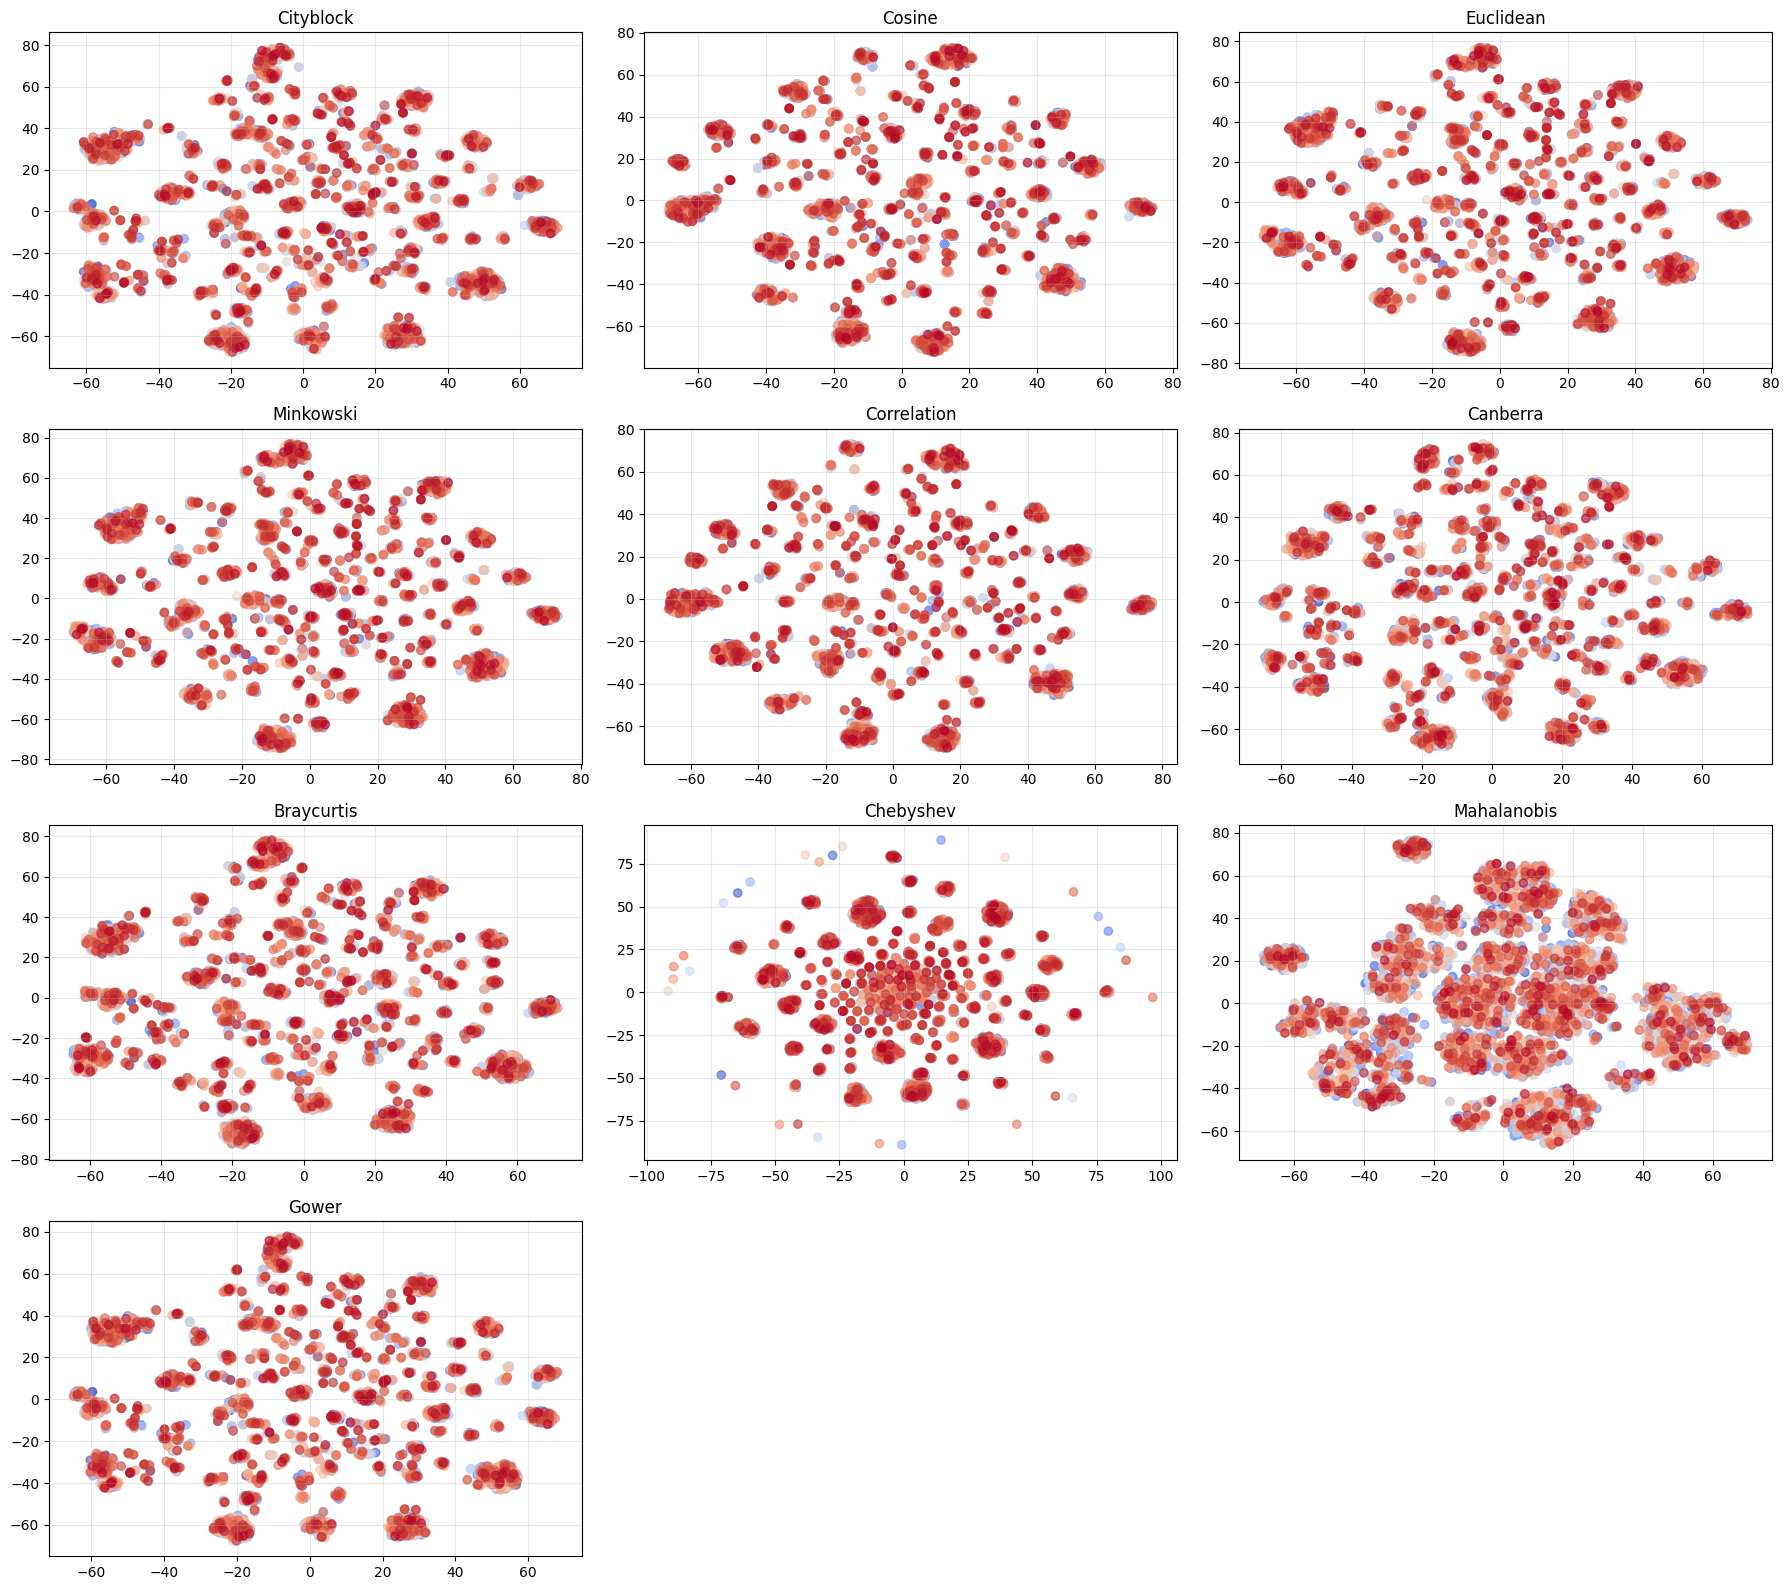

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import gower
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.utils import check_random_state
from scipy.spatial.distance import pdist, squareform

# Ensure X is numeric
X = X.astype(float)

# For reproducibility
random_state = check_random_state(42)

# Compute Mahalanobis distance (handling singular matrix)
try:
    VI = np.linalg.pinv(np.cov(X.T))  # Use pseudo-inverse to avoid singularity
    mahalanobis_distances = squareform(pdist(X, metric='mahalanobis', VI=VI))
except np.linalg.LinAlgError:
    print("⚠️ Mahalanobis distance computation failed due to singularity.")
    mahalanobis_distances = None

# Convert X back to DataFrame for Gower distance computation
X_df = pd.DataFrame(X)

# Compute all other distances
distance_matrices = {
    'cityblock': squareform(pdist(X, metric='cityblock')),
    'cosine': squareform(pdist(X, metric='cosine')),
    'euclidean': squareform(pdist(X, metric='euclidean')),
    'minkowski': squareform(pdist(X, metric='minkowski')),
    'correlation': squareform(pdist(X, metric='correlation')),
    'canberra': squareform(pdist(X, metric='canberra')),
    'braycurtis': squareform(pdist(X, metric='braycurtis')),
    'chebyshev': squareform(pdist(X, metric='chebyshev')),
}

# Add Mahalanobis distance only if computation was successful
if mahalanobis_distances is not None:
    distance_matrices['mahalanobis'] = mahalanobis_distances

# Compute Gower distance, handling possible errors
try:
    distance_matrices['gower'] = gower.gower_matrix(X_df)
except Exception as e:
    print(f"⚠️ Gower distance computation failed: {e}")

# Remove any distance matrices that contain NaN values
distance_matrices = {k: v for k, v in distance_matrices.items() if not np.isnan(v).any()}

print("✅ Using distance metrics:", list(distance_matrices.keys()))

# Dynamically adjust subplot grid
num_metrics = len(distance_matrices)
rows = (num_metrics // 3) + (num_metrics % 3 > 0)  # Ensure enough rows

plt.figure(figsize=(18, rows * 4))

# Apply t-SNE and plot results
for idx, (metric, distances) in enumerate(distance_matrices.items(), start=1):
    tsne = TSNE(metric='precomputed', random_state=42, init='random')

    try:
        Y_tsne = tsne.fit_transform(distances)
        plt.subplot(rows, 3, idx)
        plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=np.arange(len(Y_tsne)), cmap='coolwarm', alpha=0.6)
        plt.title(metric.capitalize())
        plt.grid(True, alpha=0.3)
    except ValueError as e:
        print(f"❌ TSNE failed for metric '{metric}': {e}")

plt.tight_layout()
plt.show()

<br>

Now, Let's scale up and try a **3-D t-SNE embedding**...

<br>

In [94]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import gower
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.utils import check_random_state
import ipywidgets as widgets
from IPython.display import display

# Ensure X is numeric
X = X.astype(float)

# For reproducibility
random_state = check_random_state(42)

# Define parameters
perplexities = [5, 30, 50]
distance_metrics = ['gower', 'mahalanobis', 'canberra', 'braycurtis', 'chebyshev', 
                    'cityblock', 'cosine', 'euclidean', 'minkowski', 'correlation']

# Dropdown widgets for selecting metric and perplexity
metric_dropdown = widgets.Dropdown(
    options=distance_metrics,
    value='gower',
    description='Metric:',
    style={'description_width': 'initial'}
)

perplexity_dropdown = widgets.Dropdown(
    options=perplexities,
    value=30,
    description='Perplexity:',
    style={'description_width': 'initial'}
)

# Function to compute t-SNE and generate interactive 3D plot
def update_plot(metric, perplexity):
    try:
        # Compute distance matrix
        if metric == 'gower':
            X_df = pd.DataFrame(X)  # Ensure Gower input is a DataFrame
            distances = gower.gower_matrix(X_df)
        elif metric == 'mahalanobis':
            try:
                VI = np.linalg.pinv(np.cov(X.T))  # Use pseudo-inverse to avoid singularity
                distances = squareform(pdist(X, metric='mahalanobis', VI=VI))
            except np.linalg.LinAlgError:
                print("⚠️ Mahalanobis distance computation failed due to singularity.")
                return
        else:
            distances = squareform(pdist(X, metric=metric))
        
        # Check for NaNs before passing to TSNE
        if np.isnan(distances).any():
            print(f"⚠️ Distance matrix for {metric} contains NaN values. Skipping visualization.")
            return

        # Apply t-SNE
        tsne = TSNE(n_components=3, metric='precomputed', perplexity=perplexity, random_state=42, init='random')
        Y_tsne_3d = tsne.fit_transform(distances)

        # Create interactive 3D scatter plot with improved visuals
        fig = go.Figure()
        fig.add_trace(go.Scatter3d(
            x=Y_tsne_3d[:, 0],
            y=Y_tsne_3d[:, 1],
            z=Y_tsne_3d[:, 2],
            mode='markers',
            marker=dict(size=3, color=Y_tsne_3d[:, 0], colorscale='Turbo', opacity=0.5)
        ))

        fig.update_layout(
            title=f'3D t-SNE with {metric.capitalize()} Distance - Perplexity {perplexity}',
            scene=dict(
                xaxis_title='TSNE 1',
                yaxis_title='TSNE 2',
                zaxis_title='TSNE 3',
                aspectmode='cube'  # Keeps the 3D aspect ratio balanced
            ),
            margin=dict(l=0, r=0, b=0, t=50),
            width=700,  # Increased figure width for better visualization
            height=500   # Increased figure height for better visualization
        )

        fig.show()
    
    except ValueError as e:
        print(f"❌ TSNE failed for metric '{metric}' (Perplexity {perplexity}): {e}")

# Function to handle widget updates
def on_change(change):
    update_plot(metric_dropdown.value, perplexity_dropdown.value)

metric_dropdown.observe(on_change, names='value')
perplexity_dropdown.observe(on_change, names='value')

display(metric_dropdown, perplexity_dropdown)
update_plot(metric_dropdown.value, perplexity_dropdown.value)

Dropdown(description='Metric:', options=('gower', 'mahalanobis', 'canberra', 'braycurtis', 'chebyshev', 'cityb…

Dropdown(description='Perplexity:', index=1, options=(5, 30, 50), style=DescriptionStyle(description_width='in…



# **HINTs**:

* **Try different metrics**. If you want inspiration: [Comprehensive Survey on Distance/Similarity Measures between Probability Density Functions](http://www.fisica.edu.uy/~cris/teaching/Cha_pdf_distances_2007.pdf).

<br>

* **You can create a custom distance metric**. For example, for the categorical variables you might use the [Hamming Distance/Similarity](https://en.wikipedia.org/wiki/Hamming_distance)), or the [Tanimoto distance](https://en.wikipedia.org/wiki/Jaccard_index#:~:text=the%20simplex%20representation.-,Tanimoto%20simil[arity%20and%20distance,-%5Bedit%5D), and its [Scipy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.rogerstanimoto.html), and for the numerical features you might use the [L1 norm (aka Manhattan, or City Block distance)](https://en.wikipedia.org/wiki/Taxicab_geometry), or whatever you think might work. Then you can combine them using some weighting system, e.g., relative weight of categorical/numerical variables.
You can also give a different weight to each variable, based on relative importance (e.g. if you believe that the profession weighs more than financial education, weight these two variables differently).

<br>

* **Play with the hyperparameter "perplexity"**: have a look at the [t-SNE scikit-learn class](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) and tune this key hyperparameter. I used the default value, because I want to make you work a little bit and experiment... This hyperparameter is, roughly, a guess about the number of neighbors of each point. The perplexity value has a significant effect on the output of TSNE (and clustering detection). Thus, to get the most out of t-SNE, it is better to tune this hyperparameter, trying different perplexity values. To do this you can use a **non-linear grid search**: start with a few distant values, when you find a "zone" of values ​​that seems sensible to you, make the grid denser, and so on. It is common to use a logarithmic scale of values, to give you an idea. Watch out for calculation times: t-SNE is heavy...

<br>


##PCA

Now we try **Principal Component Analysis (PCA)**: we use PCA, another popular dimensionality reduction method, as an alternative exploratory technique to give you a way to visualise the relationships between variables in a lower dimensional space, eventually spotting clusters.

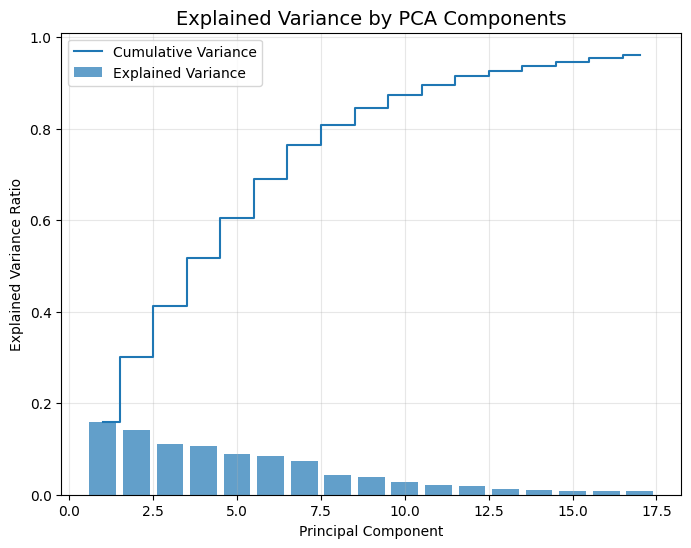

Explained Variance Ratios: [0.15957491 0.14142571 0.11056701 0.10601033 0.088003   0.08352963
 0.07428544 0.04413947 0.03782378 0.02802017 0.02156514 0.01937117
 0.01243978 0.00966241 0.00901108 0.0083375  0.0076713 ]
Cumulative Variance Explained: [0.15957491 0.30100061 0.41156762 0.51757795 0.60558095 0.68911058
 0.76339601 0.80753549 0.84535927 0.87337944 0.89494458 0.91431575
 0.92675553 0.93641793 0.94542902 0.95376652 0.96143782]


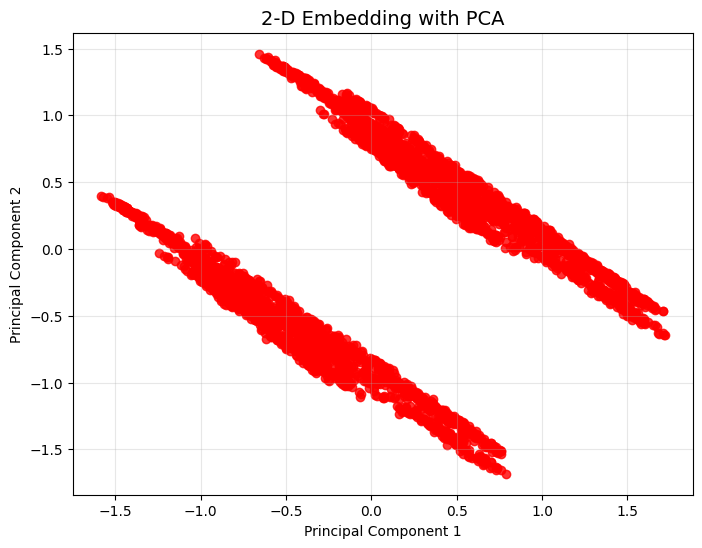

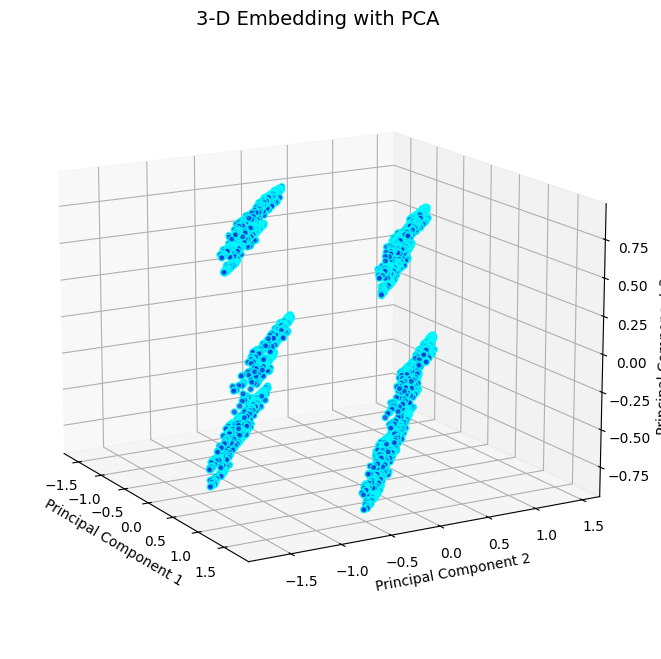

In [98]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=17)  # 17 PC
X_pca = pca.fit_transform(X)

# Explained variance
plt.figure(figsize=(8, 6))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Explained Variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Variance')
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Explained variance by each PCA Component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Cumulative variance explained
print("Cumulative Variance Explained:", np.cumsum(explained_variance))


# 2D Embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red', alpha=0.8)
plt.title('2-D Embedding with PCA', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()


# 3D Embedding
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
           edgecolor='cyan', facecolor=(0, 0.25, 0.85), alpha=0.8)

ax.set_title('3-D Embedding with PCA', fontsize=14)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.view_init(elev=15, azim=-30)

plt.show()


# **HINTS**:
* **Try other dimensionality techniques** such as, for example, **[Indipendent Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)**, or **[Factor Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html)**, and compare the results in 2-D and 3-D. This is also an interesting algorithm, **[PACMAP](https://pypi.org/project/pacmap/)**. And **[UMAP](https://github.com/lmcinnes/umap)**, too.

<br>

* **Start to get an idea of ​​the existence and number of clusters**: Do you see clusters around (with any of these dimensionality reduction techniques)? How many? Explore and inspect the underlying data, try to understand if hypotetical clusters sounds meaningful or they look like mathematical artefacts.


# Clustering in action

In the following code snippets:

* **We cluster our data into different k cluster**, k = 3, 4,... using **k-medoid**, as mentioned before.
* **We visualize clusters in a lower dimensional space for each value of k**(remember all the caveats of visualization in applying dimensionality reduction techniques).

<br>

I write a dedicated function for convenience of use.

<br>

In [52]:
#pip install scikit-learn-extra

In [99]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import gower
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn_extra.cluster import KMedoids
from sklearn.utils import check_random_state
import ipywidgets as widgets
from IPython.display import display

# Define parameters
distance_metrics = ['gower', 'cityblock', 'cosine', 'euclidean', 'minkowski', 'correlation', 'canberra', 'braycurtis', 'chebyshev']
num_clusters = [3, 4, 5, 6, 7, 8, 9, 10]
perplexities = [5, 10, 30, 50, 100]  # Added perplexity options

# For reproducibility
random_state = check_random_state(42)

# Dropdown widgets for selecting metric, number of clusters, and perplexity
metric_dropdown = widgets.Dropdown(
    options=distance_metrics,
    value='gower',
    description='Distance Metric:',
    style={'description_width': 'initial'}
)

cluster_dropdown = widgets.Dropdown(
    options=num_clusters,
    value=3,
    description='Clusters:',
    style={'description_width': 'initial'}
)

perplexity_dropdown = widgets.Dropdown(
    options=perplexities,
    value=30,
    description='Perplexity:',
    style={'description_width': 'initial'}
)

# Compute distance matrix dynamically
def compute_distance_matrix(X, metric):
    if metric == 'gower':
        return gower.gower_matrix(X)
    else:
        return squareform(pdist(X, metric=metric))

# Function to perform k-medoids clustering
def perform_kmedoids_clustering(Y_3d, k, distance_matrix):
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42, init='k-medoids++', max_iter=300)
    labels = kmedoids.fit_predict(distance_matrix)
    return labels

# Function to compute t-SNE and generate interactive 3D plot
def update_plot(metric, num_clusters, perplexity):
    # Compute selected distance matrix
    distance_matrix = compute_distance_matrix(X, metric)
    
    # Apply t-SNE with chosen perplexity
    tsne = TSNE(n_components=3, metric='precomputed', perplexity=perplexity, random_state=42, init='random')
    Y_tsne_3d = tsne.fit_transform(distance_matrix)
    
    # Perform clustering
    labels = perform_kmedoids_clustering(Y_tsne_3d, num_clusters, distance_matrix)
    
    # Create interactive 3D scatter plot with improved visuals
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=Y_tsne_3d[:, 0],
        y=Y_tsne_3d[:, 1],
        z=Y_tsne_3d[:, 2],
        mode='markers',
        marker=dict(size=3, color=labels, colorscale='Turbo', opacity=0.7)
    ))
    
    fig.update_layout(
        title=f'3D t-SNE with {metric.capitalize()} Distance - {num_clusters} Clusters - Perplexity {perplexity}',
        scene=dict(
            xaxis_title='TSNE 1',
            yaxis_title='TSNE 2',
            zaxis_title='TSNE 3',
            aspectmode='cube'  # Keeps the 3D aspect ratio balanced
        ),
        margin=dict(l=0, r=0, b=0, t=50),
        width=700,  # Adjusted figure width for better visualization
        height=500   # Adjusted figure height for better visualization
    )
    
    fig.show()

# Function to handle widget updates
def on_change(change):
    update_plot(metric_dropdown.value, cluster_dropdown.value, perplexity_dropdown.value)

metric_dropdown.observe(on_change, names='value')
cluster_dropdown.observe(on_change, names='value')
perplexity_dropdown.observe(on_change, names='value')

display(metric_dropdown, cluster_dropdown, perplexity_dropdown)
update_plot(metric_dropdown.value, cluster_dropdown.value, perplexity_dropdown.value)

Dropdown(description='Distance Metric:', options=('gower', 'cityblock', 'cosine', 'euclidean', 'minkowski', 'c…

Dropdown(description='Clusters:', options=(3, 4, 5, 6, 7, 8, 9, 10), style=DescriptionStyle(description_width=…

Dropdown(description='Perplexity:', index=2, options=(5, 10, 30, 50, 100), style=DescriptionStyle(description_…

In [102]:

#cluster_results = {}
#for k in range(3, 7):
#    labels = perform_kmedoids_clustering(X, Y_gower_3d, k, gower_distances)
#    cluster_results[k] = labels


# Clustering Evaluation

After performing k-medoids clustering with different k values, **we need to evaluate the quality of our clustering solutions**.

This is done both **qualitatively** ("the human in the loop", indispensable) and **quantitatively**.

In order to quantitatively evaluate our clusters, we'll use three widely-recognized clustering validation metrics:

## Evaluation Metrics

1. **[Calinski-Harabasz Index](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index)**
   - Measures the ratio of between-cluster dispersion to within-cluster dispersion.
   - Higher values indicate better clustering.
   - Best for well-separated, globular clusters.
   
2. **[Davies-Bouldin Index](https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index)**
   - Measures the average similarity between each cluster and its most similar one.
   - Lower values indicate better clustering.
   - Particularly useful when clusters are convex and well-separated.

3. **[Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)**
   - Measures how similar an object is to its own cluster compared to other clusters.
   - Range: [-1, 1] where:
     - 1: Points are well matched to their clusters.
     - 0: Points are on the decision boundary.
     - -1: Points might be assigned to wrong clusters.
   - Works well with Gower distance for mixed data types.

## Visualization
The code produces three plots showing how each metric varies with the number of clusters (k). This helps **identify the optimal number of clusters** according to different criteria.

<br>


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# Clustering evaluation function
def evaluate_clustering(X, cluster_results, gower_distances=None):
    if not cluster_results:
        print("⚠️ No clustering results provided. Exiting evaluation.")
        return None, None, None

    k_values = list(cluster_results.keys())

    # Initialize metrics
    ch_scores = []
    db_scores = []
    sil_scores = []

    # Calculate metrics for each k
    for k in k_values:
        labels = cluster_results[k]

        try:
            ch_scores.append(calinski_harabasz_score(X, labels))
            db_scores.append(davies_bouldin_score(X, labels))

            # Use Gower distances if available, otherwise default to Euclidean
            if gower_distances is not None:
                sil_scores.append(silhouette_score(gower_distances, labels, metric='precomputed'))
            else:
                sil_scores.append(silhouette_score(X, labels))

        except ValueError as e:
            print(f"⚠️ Skipping k={k} due to an error: {e}")
            ch_scores.append(np.nan)
            db_scores.append(np.nan)
            sil_scores.append(np.nan)

    # Remove NaN values from scores
    valid_indices = ~np.isnan(ch_scores) & ~np.isnan(db_scores) & ~np.isnan(sil_scores)
    
    if not np.any(valid_indices):
        print("⚠️ No valid clustering results to evaluate. Exiting.")
        return None, None, None

    k_values = np.array(k_values)[valid_indices]
    ch_scores = np.array(ch_scores)[valid_indices]
    db_scores = np.array(db_scores)[valid_indices]
    sil_scores = np.array(sil_scores)[valid_indices]

    # Plot evaluation metrics
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.plot(k_values, ch_scores, 'bo-')
    ax1.set_title('Calinski-Harabasz Score')
    ax1.set_xlabel('Number of Clusters')
    ax1.grid(True)

    ax2.plot(k_values, db_scores, 'ro-')
    ax2.set_title('Davies-Bouldin Score')
    ax2.set_xlabel('Number of Clusters')
    ax2.grid(True)

    ax3.plot(k_values, sil_scores, 'go-')
    ax3.set_title('Silhouette Score')
    ax3.set_xlabel('Number of Clusters')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

    # Print optimal k-values
    if len(ch_scores) > 0:
        print(f"✅ Optimal k according to Calinski-Harabasz: {k_values[np.argmax(ch_scores)]}")
    if len(db_scores) > 0:
        print(f"✅ Optimal k according to Davies-Bouldin: {k_values[np.argmin(db_scores)]}")
    if len(sil_scores) > 0:
        print(f"✅ Optimal k according to Silhouette: {k_values[np.argmax(sil_scores)]}")

    return ch_scores, db_scores, sil_scores

# Evaluate clustering results
ch_scores, db_scores, sil_scores = evaluate_clustering(X, cluster_results, gower_distances)

⚠️ No clustering results provided. Exiting evaluation.


## How to decide? Cluster number selection through voting

In clustering there is often no one "correct answer" - one clustering may be better than another by one metric, and the reverse may be true using another metric.

So we implement a **robust voting scheme** to determine the optimal number of clusters by:
1. Collecting recommendations from three different validation metrics.
2. Taking their median value as the final decision.

This approach:
- Balances different evaluation perspectives.
- Provides stability against outlier recommendations.
- Reduces the impact of individual metric biases.

The final number of clusters represents a consensus among:
- Calinski-Harabasz Index.
- Davies-Bouldin Index.
- Silhouette Score.

<br>


In [ ]:
def get_optimal_k_voting(X, cluster_results, gower_distances):
    k_values = list(cluster_results.keys())

    # Get optimal k for each metric
    ch_optimal = k_values[np.argmax(calinski_harabasz_score(X, cluster_results[k])
                                  for k in k_values)]

    db_optimal = k_values[np.argmin(davies_bouldin_score(X, cluster_results[k])
                                  for k in k_values)]

    sil_optimal = k_values[np.argmax(silhouette_score(gower_distances, cluster_results[k],
                                    metric='precomputed') for k in k_values)]

    # Get median k
    optimal_k = int(np.median([ch_optimal, db_optimal, sil_optimal]))

    # Print results
    print("\nVoting Results:")
    print(f"Calinski-Harabasz suggests: {ch_optimal} clusters")
    print(f"Davies-Bouldin suggests: {db_optimal} clusters")
    print(f"Silhouette suggests: {sil_optimal} clusters")
    print(f"\nFinal decision (median): {optimal_k} clusters")

    return optimal_k

# Get the optimal k through robust voting
final_k = get_optimal_k_voting(X, cluster_results, gower_distances)



# Comprehensive Cluster Analysis: interpreting results

## Initial Statistical Analysis
After applying k-medoids clustering with our optimal k=3 (determined through voting scheme), we perform a thorough statistical examination of the clusters, doing different things. The idea is to get visual insight through multiple complementary plots, and overview perspectives of cluster characteristics.
This is the foundation for business interpretation of results.

### Descriptive Statistics
- **Numerical Variables**: For each cluster, we compute:
  - Mean values.
  - Standard deviations.
  - Medians.
  - Counts.
  These statistics help identify central tendencies and variability within clusters.

- **Categorical Variables**: We analyze:
  - Percentage distributions within each cluster.
  - Cross-tabulations.
  - Relative frequencies.
  These reveal the categorical composition of each cluster.


#### 1. Pair Plots
- Shows relationships between all numerical variables.
- Color-coded by cluster membership.
- Histograms for individual variable distributions.
- Can reveal potential correlations and patterns specific to clusters.

#### 2. Box Plots
- Distribution of each numerical variable within clusters.
- Visualization of median values.
- Identification of outliers.
- Range comparison between clusters.
- Quick detection of cluster-specific patterns.

#### 3. Radar Charts
- Relative strength of each variable across clusters.
- Distinctive shapes representing cluster signatures.
- Comparison of cluster characteristics.
- Overall pattern recognition.
- Immediate visualization of cluster differences.


<br>


In [ ]:
import seaborn as sns


# Apply k-medoids with optimal k=3
kmedoids_optimal = KMedoids(
    n_clusters=3,
    metric='precomputed',
    random_state=42
)
cluster_labels = kmedoids_optimal.fit_predict(gower_distances)

# Add cluster labels to original dataframe
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels

# Descriptive statistics for numerical variables by cluster
def get_cluster_stats(data, numerical_columns):
    stats = []
    for cluster in range(3):
        cluster_data = data[data['Cluster'] == cluster]
        cluster_stats = cluster_data[numerical_columns].agg(['mean', 'std', 'median', 'count']).round(3)
        cluster_stats.columns = [f'Cluster_{cluster}_{col}' for col in cluster_stats.columns]
        stats.append(cluster_stats)
    return pd.concat(stats, axis=1)

# Categorical variables distribution by cluster
def get_categorical_distributions(data, categorical_columns):
    dist_tables = []
    for col in categorical_columns:
        dist = pd.crosstab(data['Cluster'], data[col], normalize='index') * 100
        dist_tables.append(dist.round(2))
    return dist_tables

# Create visualization function
def plot_cluster_analysis(data, numerical_columns):
    # Pair plot with cluster colors
    g = sns.pairplot(data,
                     vars=numerical_columns,
                     hue='Cluster',
                     diag_kind='hist',
                     plot_kws={'alpha': 0.6})
    g.fig.suptitle('Cluster distribution across numerical variables', y=1.02)
    plt.show()

# Execute analysis
numerical_stats = get_cluster_stats(data_with_clusters, numerical_features.columns)
categorical_dists = get_categorical_distributions(data_with_clusters, categorical_columns)

# Display results
print("Numerical variables statistics by cluster:")
print(numerical_stats)

print("\nCategorical variables distribution by cluster (%):")
for i, col in enumerate(categorical_columns):
    print(f"\n{col} Distribution:")
    print(categorical_dists[i])

# Create visualizations
plot_cluster_analysis(data_with_clusters, numerical_features.columns)


In [ ]:
# Box plots for numerical variables by cluster
def plot_cluster_boxplots(data):
    num_vars = len(numerical_features.columns)
    fig, axes = plt.subplots(num_vars, 1, figsize=(12, 4*num_vars))
    fig.suptitle('Distribution of numerical variables by cluster', fontsize=16, y=1.02)

    for i, column in enumerate(numerical_features.columns):
        sns.boxplot(x='Cluster', y=column, data=data_with_clusters, ax=axes[i])
        axes[i].set_title(f'{column} Distribution')

    plt.tight_layout()
    plt.show()

def plot_cluster_radar(data):
    # Create a copy of the data for normalization
    plot_data = data.copy()

    # Normalize all numerical variables using MinMaxScaler
    scaler = MinMaxScaler()
    plot_data[numerical_features.columns] = scaler.fit_transform(plot_data[numerical_features.columns])

    # Calculate mean values for each numerical variable by cluster
    cluster_means = plot_data.groupby('Cluster')[numerical_features.columns].mean()

    # Set up the radar chart
    categories = numerical_features.columns
    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

    # Plot for each cluster
    for cluster in range(3):
        values = cluster_means.loc[cluster].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)

    # Set chart properties
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    plt.xticks(angles[:-1], categories)
    ax.set_title("Cluster profiles (all variables are normalized)", y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

# Execute both visualizations
plot_cluster_boxplots(data_with_clusters)
plot_cluster_radar(data_with_clusters)


## DBSCAN Clustering Analysis

Let's try another clustering technique (there are tons of them): **[DBSCAN (Density-Based Spatial Clustering of Applications with Noise)](https://en.wikipedia.org/wiki/DBSCAN)**, which might offer several advantages for our bank client segmentation. DBSCAN is one of the most commonly used clustering algorithms, and for a good reason.

## Key Features

1. **Automatic Cluster Detection**
   - Discovers clusters naturally present in the data.
   - **No need to specify number of clusters beforehand**.
   - Lets the data structure guide the clustering process.

2. **Density-Based Approach**
   - Discovers clusters of arbitrary shape
   - Naturally handles outliers by marking them as noise points
   - Forms clusters based on density connectivity

3. **Implementation with Gower Distance (or other distances you like)**
   - Uses our pre-computed Gower distance matrix.
   - Might cope well with our mixed-type data (numerical and categorical).
   - Maintains proper distance relationships between observations.

## Parameters

The algorithm requires **two main hyperparameters**:
- **eps (ε)**: Maximum distance between two points to be considered neighbors.
- **min_samples**: Minimum number of points required to form a dense region.

## Evaluation Strategy

We evaluate multiple eps values (i.e. doing some work for hyperparameter tuning) while keeping min_samples constant to:
- Find optimal density parameters.
- Identify natural groupings in the data.
- Balance between noise points and cluster formation.

## Visualization

- 3D cluster visualizations for each eps value.
- Analysis of number of clusters vs eps.
- Distribution of noise points across different parameters.

Thus, this implementation helps identify natural customer segments while isolating unusual cases as noise points.

<br>

In [ ]:
# DBSCAN Clustering with Gower distance
from sklearn.cluster import DBSCAN


# Function to perform DBSCAN clustering with different epsilon values
def perform_dbscan_clustering(gower_distances, eps_values, min_samples=5):
    results = {}

    for eps in eps_values:
        # Initialize and fit DBSCAN
        dbscan = DBSCAN(
            eps=eps,
            min_samples=min_samples,
            metric='precomputed'
        )

        # Fit using Gower distances
        labels = dbscan.fit_predict(gower_distances)

        # Store results
        results[eps] = {
            'labels': labels,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0),
            'n_noise': list(labels).count(-1)
        }

        # Visualize clusters in 3D
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot noise points
        noise_mask = labels == -1
        ax.scatter(Y_gower_3d[noise_mask, 0],
                  Y_gower_3d[noise_mask, 1],
                  Y_gower_3d[noise_mask, 2],
                  c='gray', marker='x', label='Noise')

        # Plot clusters
        colors = plt.cm.rainbow(np.linspace(0, 1, results[eps]['n_clusters']))
        for i, color in enumerate(colors):
            mask = labels == i
            ax.scatter(Y_gower_3d[mask, 0],
                      Y_gower_3d[mask, 1],
                      Y_gower_3d[mask, 2],
                      c=[color], label=f'Cluster {i}')

        ax.set_title(f'DBSCAN clustering (eps={eps:.3f})')
        ax.legend()
        plt.show()

        # Calculate silhouette score if more than one cluster and no noise points
        if results[eps]['n_clusters'] > 1 and results[eps]['n_noise'] == 0:
            sil_score = silhouette_score(gower_distances, labels, metric='precomputed')
            results[eps]['silhouette'] = sil_score
        else:
            results[eps]['silhouette'] = None

        print(f"\nEpsilon: {eps:.3f}")
        print(f"Number of clusters: {results[eps]['n_clusters']}")
        print(f"Number of noise points: {results[eps]['n_noise']}")
        print(f"Silhouette score: {results[eps]['silhouette']}")

    return results

# Define epsilon values to try
eps_values = np.linspace(0.025, 0.14, 5)

# Run DBSCAN with different epsilon values
dbscan_results = perform_dbscan_clustering(gower_distances, eps_values)

# Plot summary of results
plt.figure(figsize=(12, 5))

# Number of clusters vs epsilon
plt.subplot(1, 2, 1)
eps_list = list(dbscan_results.keys())
n_clusters = [res['n_clusters'] for res in dbscan_results.values()]
plt.plot(eps_list, n_clusters, 'bo-')
plt.xlabel('Epsilon')
plt.ylabel('Number of clusters')
plt.title('Number of clusters vs epsilon')
plt.grid(True)

# Noise points vs epsilon
plt.subplot(1, 2, 2)
n_noise = [res['n_noise'] for res in dbscan_results.values()]
plt.plot(eps_list, n_noise, 'ro-')
plt.xlabel('Epsilon')
plt.ylabel('Number of noise points')
plt.title('Noise points vs epsilon')
plt.grid(True)

plt.tight_layout()
plt.show()


**Bottom line**: the idea that with DBSCAN you don't decide the number of clusters has the implication that the number of clusters depends crucially on epsilon, which must be estimated somehow - magic doesn't exist, although methods can be used to help you tune this hyperparameter.
For example, you might use a K-nearest neighbors (KNN) approach for finding optimal epsilon:

1. Create a KNN distance plot:

    * For each point in the dataset,calculate its distance to the k-th nearest neighbor.
    * These distances are sorted in ascending order.
    * The resulting plot shows how the k-th nearest neighbor distance changes across all points.

2. The "elbow" principle:

    * In the plot, you (typically) see a sharp increase ("the elbow") at some point.
    * Before the elbow: points are close to their neighbors (dense regions).
    * After the elbow: distances increase rapidly (sparse regions).
    * Thus the elbow represents the transition between dense and sparse regions: the elbow point indicates a natural distance threshold.
    * Points closer than this distance are likely in the same cluster, points farther than this distance are likely in different clusters or they are noise.

<br>


# **HINTS**:

* **Experiment with clustering methods**

There are many. For example, hierarchical clustering. But probe other methods if you like, there are many models ([see for example](https://arxiv.org/pdf/1205.1117)), and keep into account that [each has a different impact on the data, sometimes spectacularly different](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html).

* **Decide what you think is the correct number of clusters**

To do this, look at the data from the various clusters, **quantitatively** and **qualitatively** trying to understand how clusters are made, if they "make business sense". This means, for example:
    * Using quantitative metrics (see above).
    * Exploring average statistics of each cluster (see above).
    * Looking at frequency distributions for the features/variables for each cluster, or scatter plots (see above).
    * Maybe you want to eliminate some variables, which you think are uninteresting, and then perform the cluster analysis again, refining the previosu work.
  
   In the end, try to get explainable clusters; a good way is to try to describe them with a name, a short sentence - to do so, see if they are more women or men, more or less wealthy, more or less young, etc. etc. Remember, most variables are normalized, so basically you have ordered statistics.

* **Define FINANCIAL PERSONAS**

One of the most important points for you. In fact, you identify **human prototypes**, represented by clusters, with clear associated descriptions, evident semantics, which can be explained to people who deal with marketing and sales. Personas (also called "Marketing Pesonas", in this case "Financial Marketing Personas, as we are dealing with financial services) are very, very, very useful for quickly mapping a subject to a typical situation, with typical needs, recommended actions and strategies, etc. So, try.

* **Update FINANCIAL PERSONAS using Bayesian techniques**

**Simulate new data synthetically and perform a Bayesian update** of the Personas, "personalizing" them as new subject-specific data arrives. Refer to the other file "Updating_PersonasPoliMI.ipynb".

* **Bayesian Clustering**

This is perhaps more of a starting point for the final Project Work: **start from qualitatively identified clusters** that make a lot of business sense and then **use a Bayesian approach and the dataset to adapt these initial clusters** in a data-driven way. See for example the [Gaussian Mixture model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html), or [this library](https://bnpy.readthedocs.io/en/latest).


<br>

